# Vip Account

## introduction

#### The purpose of this script is to get accounts that usually have the highest usages in different years, and analyze their usage portion

In [78]:
%run include/required_libs.py
%matplotlib inline  
cycles = list(range(2013,2019))

### get  accounts with yearly top 10 usages

In [23]:
usage = pd.read_csv('rawdata/usages_by_cycle_group.csv')
usage = usage.drop(['jobs','users','cpuhours'],axis=1)
usage = usage.groupby(['cycle','account']).agg({'su':sum}).dropna()
use = usage.reset_index()

In [24]:
g = usage['su'].groupby(level=0, group_keys=False)
usage_top_10 = g.nlargest(10).to_frame().reset_index()
usage_top_10

,cycle,account,su
0,2013,pi-depablo,5599435.43
1,2013,pi-gavoth,2209172.35
2,2013,pi-roux,1628073.21
3,2013,pi-freed,1374834.35
4,2013,pi-kravtsov,1287102.48
5,2013,pi-dbiron,707289.27
6,2013,pi-dinner,517118.63
7,2013,pi-drowley,512915.20
8,2013,pi-eperozo,506681.18
9,2013,pi-fciesla,498717.06


### get the frequency of groups' appearance in yearly top_10 usages

In [25]:
top= usage_top_10.groupby('account').agg({'su':'count'})\
    .rename(columns={'su':'vip_count'})\
    .sort_values('vip_count', ascending=False).head(7).reset_index()
dalao = top['account']
top['account']

0       pi-roux
1    pi-depablo
2     pi-gavoth
3      pi-freed
4    pi-gagalli
5     pi-dbiron
6     pi-dinner
Name: account, dtype: object

## Allocation of Top 10

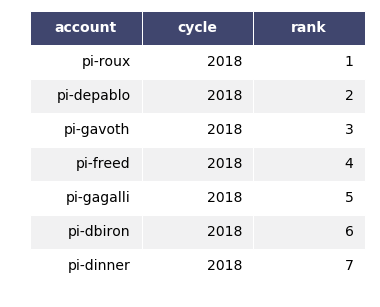

In [79]:
for i in cycles:
    vips = pd.DataFrame()
    vip = top['account'].to_frame()
    vip['cycle'] = i
    vip['rank'] = list(range(1,8))
    vips = vips.append(vip, ignore_index=False)
vips

render_mpl_table(vips, header_columns=0, col_width=2.0)
plt.savefig('image/2_3_vip_table.png')

In [7]:
alc = pd.read_csv('rawdata/allocs_by_cycle_group.csv')
alc['account'] = list(alc.account.astype("category", ordered=True, categories=dalao))

top_alc = alc.dropna().groupby(['cycle','account'])['allocation'].sum().to_frame()
top_alc = top_alc.reset_index()
top_alc

,cycle,account,allocation
0,2013,pi-dbiron,300000.0
1,2013,pi-depablo,2000000.0
2,2013,pi-dinner,500000.0
3,2013,pi-freed,700000.0
4,2013,pi-gavoth,1325000.0
5,2013,pi-roux,500000.0
6,2014,pi-dbiron,1300000.0
7,2014,pi-depablo,1400000.0
8,2014,pi-dinner,1000000.0
9,2014,pi-freed,1150000.0


### Allocation portion 

In [8]:
totals = list(alc.groupby(['cycle'])['allocation'].sum())
alc_portion = top_alc
for i in cycles:  #unit_portion is from previous copy of unit_all
    alc_portion.loc[alc_portion['cycle'] == i , 'Allocation_Portion'] = alc_portion.loc[alc_portion['cycle'] == i , 'allocation']/ totals[i-2013]
alc_portion

,cycle,account,allocation,Allocation_Portion
0,2013,pi-dbiron,300000.0,0.032450
1,2013,pi-depablo,2000000.0,0.216333
2,2013,pi-dinner,500000.0,0.054083
3,2013,pi-freed,700000.0,0.075717
4,2013,pi-gavoth,1325000.0,0.143321
5,2013,pi-roux,500000.0,0.054083
6,2014,pi-dbiron,1300000.0,0.050331
7,2014,pi-depablo,1400000.0,0.054203
8,2014,pi-dinner,1000000.0,0.038716
9,2014,pi-freed,1150000.0,0.044524


## Top 10's Usages over years

In [9]:
usage_top_10['account'] = list(usage_top_10.account.astype("category", ordered=True, categories=dalao))
top_use = usage_top_10.dropna().groupby(['cycle','account'])['su'].sum().to_frame()
top_use = top_use.reset_index()
top_use

,cycle,account,su
0,2013,pi-dbiron,707289.27
1,2013,pi-depablo,5747291.37
2,2013,pi-dinner,517118.63
3,2013,pi-freed,1408766.05
4,2013,pi-gavoth,2209442.07
5,2013,pi-roux,1628097.05
6,2014,pi-dbiron,1309947.70
7,2014,pi-depablo,6911032.32
8,2014,pi-freed,1156270.00
9,2014,pi-gavoth,2508782.00


### Usage Portion

In [10]:
totals = list(use.groupby(['cycle'])['su'].sum())
use_portion = top_use
for i in cycles:  
    use_portion.loc[use_portion['cycle'] == i , 'Consumed_Portion'] = use_portion.loc[use_portion['cycle'] == i , 'su']/ totals[i-2013]
use_portion

,cycle,account,su,Consumed_Portion
0,2013,pi-dbiron,707289.27,0.041156
1,2013,pi-depablo,5747291.37,0.334428
2,2013,pi-dinner,517118.63,0.030090
3,2013,pi-freed,1408766.05,0.081974
4,2013,pi-gavoth,2209442.07,0.128565
5,2013,pi-roux,1628097.05,0.094737
6,2014,pi-dbiron,1309947.70,0.052309
7,2014,pi-depablo,6911032.32,0.275974
8,2014,pi-freed,1156270.00,0.046173
9,2014,pi-gavoth,2508782.00,0.100182


## Combine all together

In [21]:
al = alc_portion
rank = dict(zip(dalao,list(range(1,11))))
al["Total_Rank"] = al["account"].map(rank)
vip = pd.merge(al, use_portion, how='right', on=['account','cycle'])
vip.rename(columns={'allocation': 'Allocation','su':'Consumed'}, inplace=True)
vip = vip.groupby(['cycle','account']).sum()
vip

Allocation  Allocation_Portion  Total_Rank    Consumed  \
cycle account                                                              
2013  pi-dbiron     300000.0            0.032450           6   707289.27   
      pi-depablo   2000000.0            0.216333           1  5747291.37   
      pi-dinner     500000.0            0.054083           7   517118.63   
      pi-freed      700000.0            0.075717           4  1408766.05   
      pi-gavoth    1325000.0            0.143321           2  2209442.07   
      pi-roux       500000.0            0.054083           3  1628097.05   
2014  pi-dbiron    1300000.0            0.050331           6  1309947.70   
      pi-depablo   1400000.0            0.054203           1  6911032.32   
      pi-freed     1150000.0            0.044524           4  1156270.00   
      pi-gavoth    2494000.0            0.096558           2  2508782.00   
      pi-roux      2000000.0            0.077432           3  2038391.79   
2015  pi-dbiron    1400000.0            0.032088           6  1096899.54   
      pi-depablo   2000000.0            0.045839           1  4494578.96   
      pi-freed     1100000.0            0.025212           4  1200897.97   
      pi-gagalli   1000000.0            0.022920           5  1000469.23   
      pi-gavoth    3610560.0            0.082753           2  3620870.03   
      pi-roux      3500000.0            0.080219           3  3501293.27   
2016  pi-depablo   3250000.0            0.062818           1  2070821.75   
      pi-freed     1550000.0            0.029960           4  1491106.41   
      pi-gagalli   1500000.0            0.028993           5   729872.57   
      pi-gavoth    2600000.0            0.050255           2  1797102.35   
      pi-roux      2000000.0            0.038658           3   981598.71   
2017  pi-depablo   6000000.0            0.071199           1  7593932.90   
      pi-dinner    1750000.0            0.020766           7  1999191.01   
      pi-freed     2200000.0            0.026106           4  2142300.15   
      pi-gagalli   3000000.0            0.035600           5  6182699.57   
      pi-gavoth    6548000.0            0.077702           2  8066797.13   
      pi-roux      2100000.0            0.024920           3  2109468.88   
2018  pi-depablo   4000000.0            0.038929           1  3169284.33   
      pi-dinner    3000000.0            0.029196           7  2001120.57   
      pi-gagalli   4000000.0            0.038929           5  2617346.60   
      pi-gavoth    4000000.0            0.038929           2  2907503.12   
      pi-roux      4000000.0            0.038929           3  2143337.05   

                  Consumed_Portion  
cycle account                       
2013  pi-dbiron           0.041156  
      pi-depablo          0.334428  
      pi-dinner           0.030090  
      pi-freed            0.081974  
      pi-gavoth           0.128565  
      pi-roux             0.094737  
2014  pi-dbiron           0.052309  
      pi-depablo          0.275974  
      pi-freed            0.046173  
      pi-gavoth           0.100182  
      pi-roux             0.081398  
2015  pi-dbiron           0.040204  
      pi-depablo          0.164739  
      pi-freed            0.044016  
      pi-gagalli          0.036670  
      pi-gavoth           0.132715  
      pi-roux             0.128332  
2016  pi-depablo          0.077449  
      pi-freed            0.055768  
      pi-gagalli          0.027297  
      pi-gavoth           0.067212  
      pi-roux             0.036712  
2017  pi-depablo          0.118998  
      pi-dinner           0.031327  
      pi-freed            0.033570  
      pi-gagalli          0.096883  
      pi-gavoth           0.126407  
      pi-roux             0.033056  
2018  pi-depablo          0.071308  
      pi-dinner           0.045025  
      pi-gagalli          0.058890  
      pi-gavoth           0.065418  
      pi-roux             0.048225

## VIP Plot

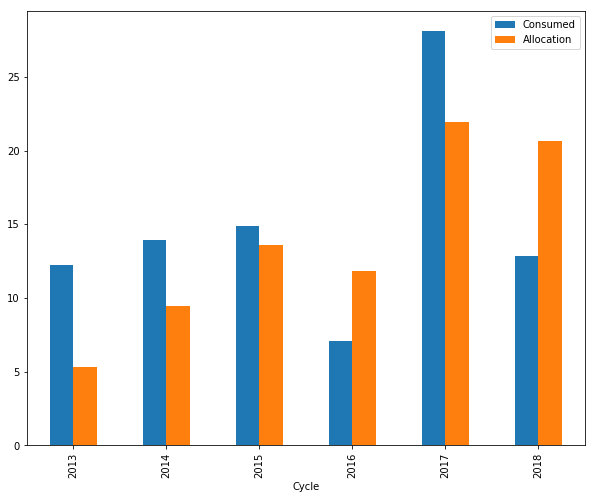

In [114]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8) 

pl = top_use.groupby('cycle')['su'].sum().to_frame()
pl['Consumed'] = pl['su']/1000000
pl['Allocation'] = top_alc.groupby('cycle')['allocation'].sum().to_frame()['allocation']/1000000
pl = pl.reset_index(drop=False)
pl.rename(columns={'cycle': 'Cycle'}, inplace=True)
pl.plot(kind='bar',x ='Cycle', y=['Consumed','Allocation'], ax=ax);

plt.savefig('image/2_3_vip_accounts.png')